In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('twitter_validation.csv',header=None,encoding='ISO-8859-1') #encoding is used since data may contain emojis and different languages
df.columns=['id','topic','target','text']
df

,id,topic,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,id,topic,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,topic,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:

df.dtypes

id         int64
topic     object
target    object
text      object
dtype: object

In [7]:
df.shape

(1000, 4)

In [8]:
df.isna().sum()

id        0
topic     0
target    0
text      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   topic   1000 non-null   object
 2   target  1000 non-null   object
 3   text    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [10]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

Text(0.5, 1.0, 'Target value count ')

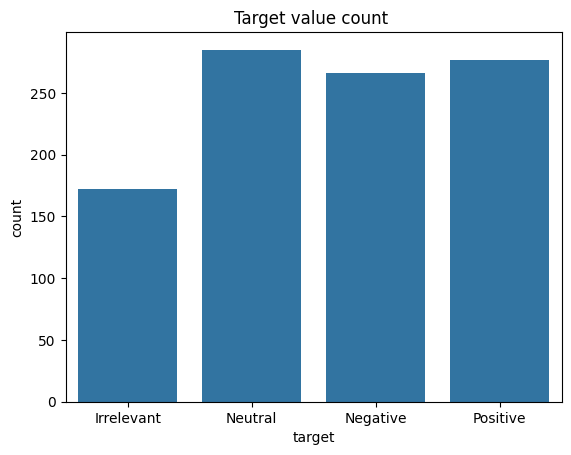

In [11]:
sns.countplot(x=df['target'])
plt.title('Target value count ')

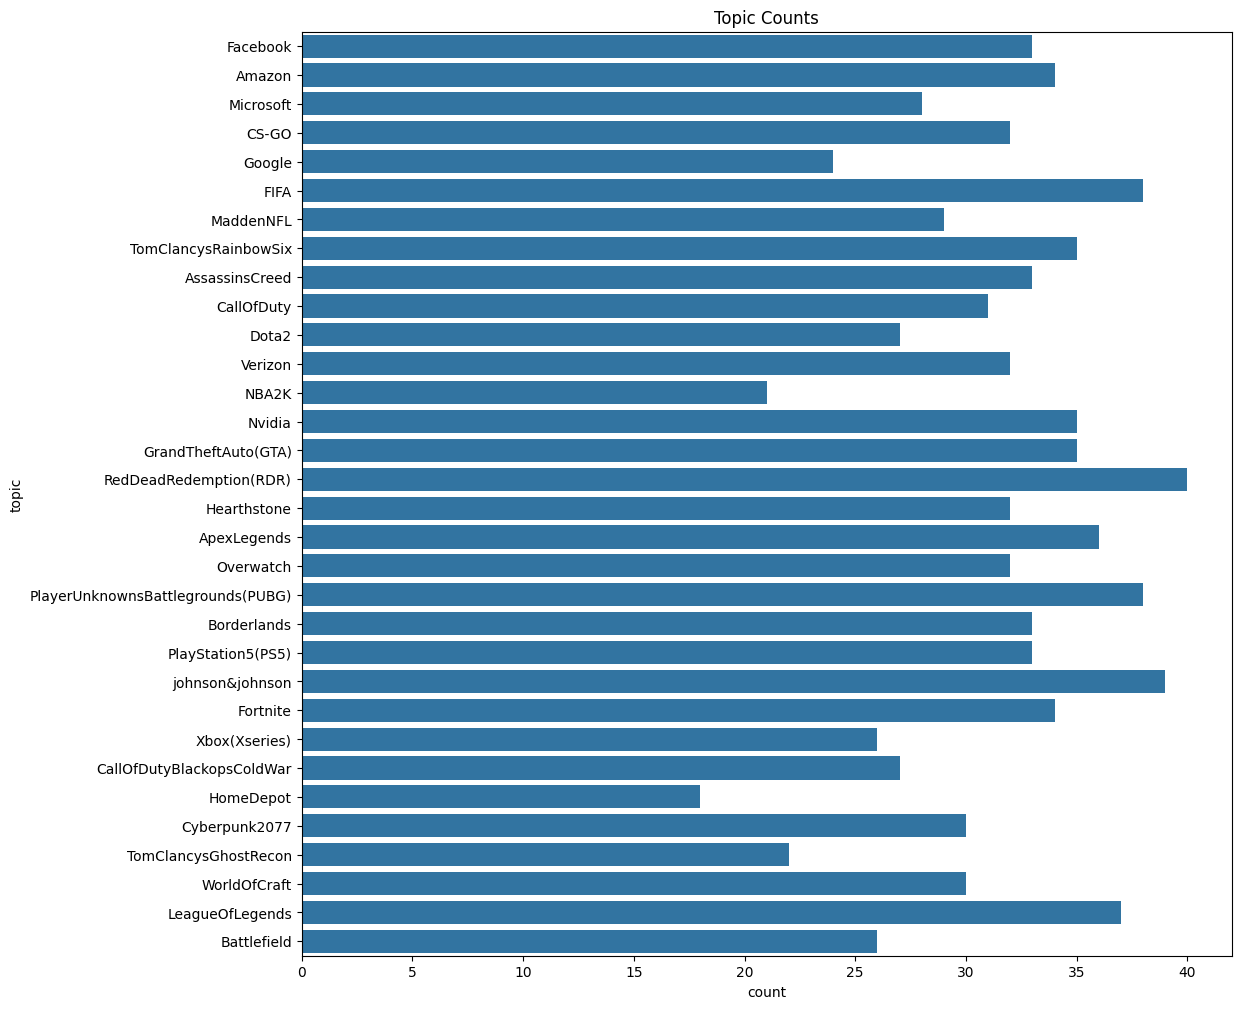

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(df['topic'])
plt.title('Topic Counts')
plt.show()

In [13]:
# Removing irrelevant comments

df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df


,id,topic,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
# reseting index values after dropping irrelavent rows

df.reset_index(drop=True,inplace=True)
df

,id,topic,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.drop(columns=['id','topic'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df['target'] = df['target'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [17]:
df.dtypes

target     int64
text      object
dtype: object

In [18]:
text=df.text
text

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

###### tokenizing

In [19]:
# from nltk.tokenize import word_tokenize
# token=word_tokenize(str(text).lower())
# token

In [20]:
# from nltk.tokenize import TweetTokenizer
# tweet_tokenizer = TweetTokenizer()
# tokens = tweet_tokenizer.tokenize(str(text).lower())
# print(tokens)

In [21]:

from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
tweets=text.apply(lambda x: tk.tokenize(x)).apply(lambda x:" ".join(x))
# Second apply() is used to join the words using space and remove the list
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [22]:
# removeing special characters

# remove_text=[]
# for i in remove_sw:
#     j=re.sub('[^A-Za-z0-9]','',i)
#     remove_text.append(j)
# print(remove_text)

tweets=tweets.str.replace('[^A-Za-z0-9]',' ',regex=True)
tweets


0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

filtering out words with more than 3 characters

In [23]:
tweets=tweets.apply(lambda x:' '.join([ w for w in tk.tokenize(x) if len(w)>=3]))
tweets
# join each word (w) at " " where the lenght of characters in (w) is >= 3

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [24]:
# stemming using snowball
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [25]:
# stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [26]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>

In [27]:
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>
  Coords	Values
  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.25069214907989

In [28]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

#### Training and testing Models

KNN
0.5381526104417671
Naive_Baies
0.5783132530120482
Support_Vector_Machine
0.5783132530120482
Logistic_Regression
0.5863453815261044
Decision_Tree
0.4538152610441767
Random_Forest
0.5381526104417671


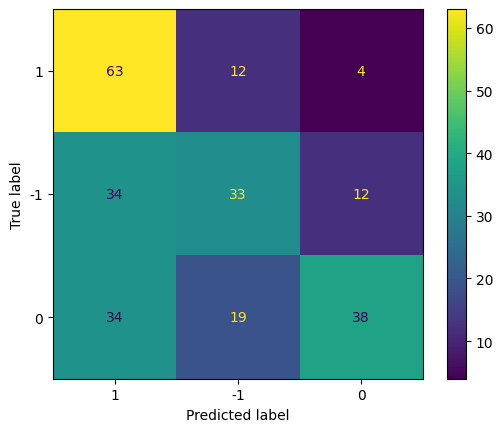

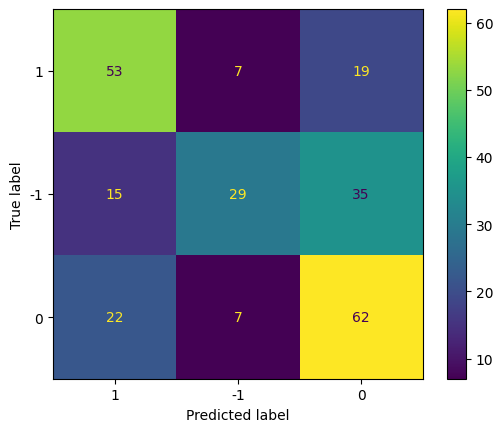

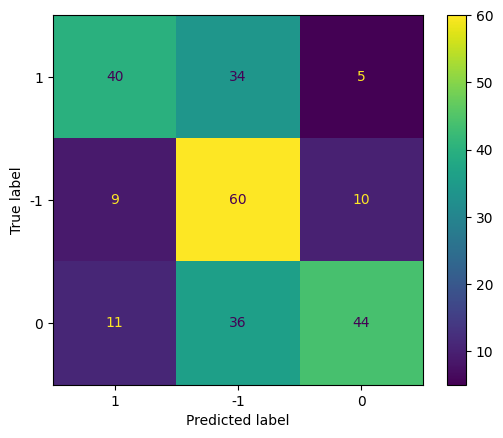

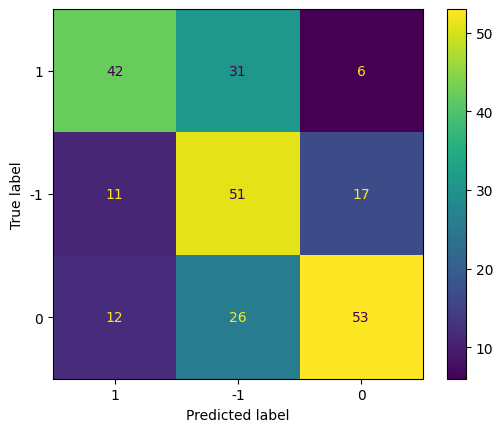

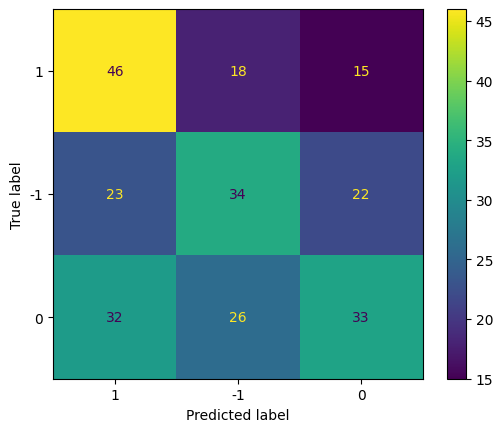

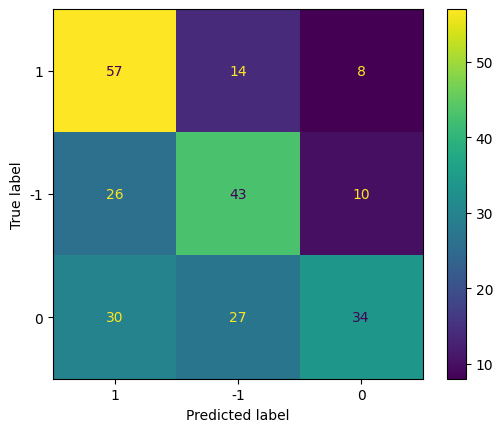

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


knn=KNeighborsClassifier(n_neighbors=11)
nb=BernoulliNB()
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
Models=['KNN','Naive_Baies','Support_Vector_Machine','Logistic_Regression','Decision_Tree','Random_Forest']
model_lst=[knn,nb,svc,lr,dtc,rfc]

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay



for i in range (len(model_lst)):
    print(Models[i])
    model=model_lst[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(cm,display_labels=['1','-1','0'])
    cmd.plot()
    